In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LBQS1435-0134

### Spectral reduction

Load in HIRES data for LBQS1435-0134

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/LBQS1435-0134/HIRES/'

Load in the flux and error files

In [3]:
flux_fits = fits.open(rootdir + 'LBQS1435-0134a_f.fits')
err_fits = fits.open(rootdir + 'LBQS1435-0134a_e.fits')

In [4]:
flux_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/LBQS1435-0134/HIRES/LBQS1435-0134a_f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     402   (152635,)   float32   


In [5]:
err_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/LBQS1435-0134/HIRES/LBQS1435-0134a_e.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     402   (152635,)   float32   


Unpack information from either FITS files

In [6]:
flux_fits[0].header

SIMPLE  =                    T / Written by IDL:  Fri Oct 18 02:28:54 2013      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =               152635 /                                                
DATE    = '2013-10-18'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
                                                                                
                                                                                
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   

Store the flux and error arrays

In [7]:
flux = flux_fits[0].data

In [8]:
flux

array([ 0.22722284,  0.9442825 , -2.163951  , ...,  1.0379715 ,
        0.9653086 ,  1.0615456 ], dtype=float32)

In [9]:
err = err_fits[0].data

In [10]:
err

array([1.3684373 , 1.48844   , 1.404771  , ..., 0.09588742, 0.09511489,
       0.08250349], dtype=float32)

In [11]:
wav = 10**(np.arange(flux_fits[0].header['CRVAL1'], 
                     flux_fits[0].header['CRVAL1']+len(flux)*flux_fits[0].header['CDELT1'], 
                     flux_fits[0].header['CDELT1']))

In [12]:
len(wav), len(flux)

(152635, 152635)

Plot the flux and error arrays

Text(0, 0.5, 'Flux (continuum normalized)')

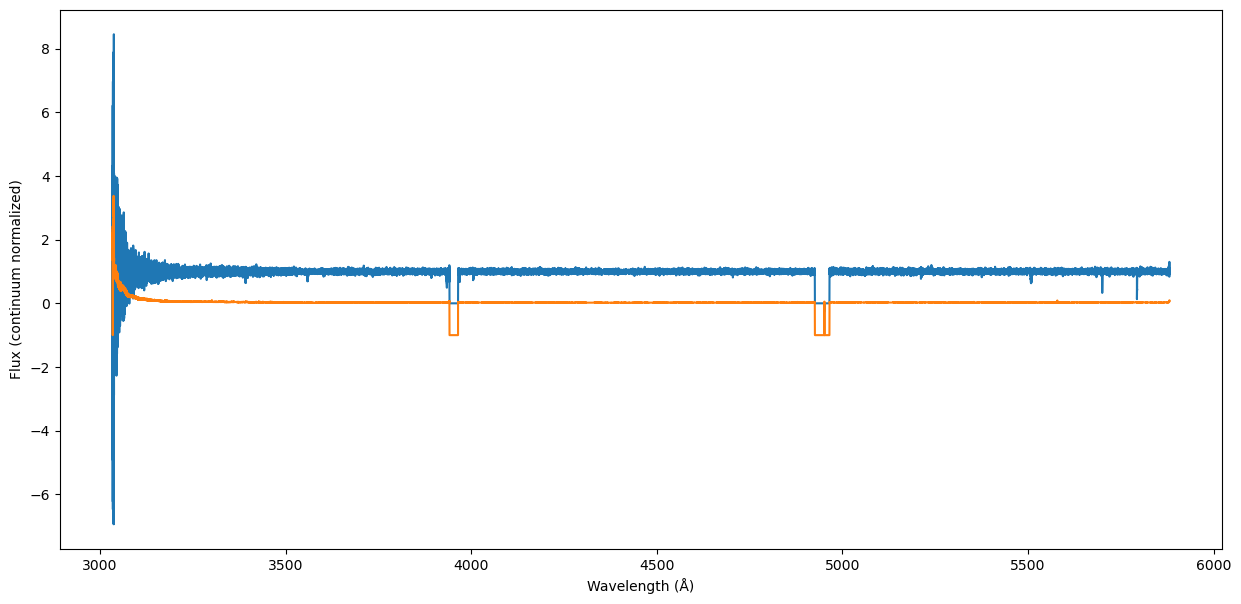

In [13]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav, flux, label='Flux')
ax.plot(wav, err, label='Error')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (continuum normalized)')

Store into a pabs0 friendly file format

In [14]:
c1 = fits.Column(name='wave    ', array=wav, format='D')
c2 = fits.Column(name='flux    ', array=flux, format='D')
c3 = fits.Column(name='error   ', array=err, format='D')
c4 = fits.Column(name='error_u ', array=err, format='D')
c5 = fits.Column(name='error_d ', array=err, format='D')
c6 = fits.Column(name='counts_total', array=np.zeros(len(wav)), format='D')
c7 = fits.Column(name='counts_net', array=np.zeros(len(wav)), format='D')
c8 = fits.Column(name='npix    ', array=np.zeros(len(wav)), format='D')
c9 = fits.Column(name='exptime ', array=np.zeros(len(wav)), format='D')
c10 = fits.Column(name='mask    ', array=np.ones(len(wav)), format='K')
c11 = fits.Column(name='continuum', array=np.ones(len(wav)), format='D')

In [15]:
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3, 
                                           c4, c5, c6, 
                                           c7, c8, c9, 
                                           c10, c11])

Load in a FUV file for sample header

In [16]:
rootdir_fuv = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/FUV/'

In [17]:
fuv_fits = fits.open(rootdir_fuv + 'PG1522+101_FUV_wavecal_new.fits')

In [18]:
fuv_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/FUV/PG1522+101_FUV_wavecal_new.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   58088R x 11C   [D, D, D, D, D, D, D, D, D, K, D]   


In [19]:
fuv_fits[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [20]:
fuv_fits[0].data

In [21]:
hdu = fits.HDUList([fuv_fits[0], table_hdu])

In [22]:
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   152635R x 11C   ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'K', 'D']   


In [23]:
#hdu.writeto(rootdir +'LBQS1435-0134_HIRES_pabs0.fits')

## PG1522+101

### Spectral reduction

Also load in HIRES data for PG1522+101

In [24]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HIRES/'

In [25]:
flux_fits = fits.open(rootdir + 'PG1522+101a_f.fits')
err_fits = fits.open(rootdir + 'PG1522+101a_e.fits')

In [26]:
flux_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HIRES/PG1522+101a_f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (155487,)   float32   


In [42]:
flux_fits[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.4a                  
BITPIX  =                  -32 /Dummy primary header created by MWRFITS         
NAXIS   =                    1 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               
CDELT1  =    1.88324151360E-06 /                                                
CRPIX1  =                    1 /                                                
CTYPE1  = 'LINEAR  '           /                                                
DC-FLAG =                    1 /                                                
NAXIS1  =               155487 /                                                
CRVAL1  =        3.47646965316 /                                                

In [27]:
err_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HIRES/PG1522+101a_e.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (155487,)   float32   


Unpack information from either FITS files

In [28]:
flux_fits[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.4a                  
BITPIX  =                  -32 /Dummy primary header created by MWRFITS         
NAXIS   =                    1 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               
CDELT1  =    1.88324151360E-06 /                                                
CRPIX1  =                    1 /                                                
CTYPE1  = 'LINEAR  '           /                                                
DC-FLAG =                    1 /                                                
NAXIS1  =               155487 /                                                
CRVAL1  =        3.47646965316 /                                                

Store the flux and error arrays

In [29]:
flux = flux_fits[0].data

In [30]:
flux

array([-6.6318496e+16, -6.6437844e+16, -6.6557807e+16, ...,
        5.4842204e-01,  5.7727015e-01,  5.8310854e-01], dtype=float32)

In [31]:
err = err_fits[0].data

In [32]:
err

array([1.2831679e+09, 1.2854758e+09, 1.2877926e+09, ..., 6.0929447e-02,
       6.2858358e-02, 6.2000807e-02], dtype=float32)

In [33]:
wav = 10**(np.arange(flux_fits[0].header['CRVAL1'], 
                     flux_fits[0].header['CRVAL1']+len(flux)*flux_fits[0].header['CDELT1'], 
                     flux_fits[0].header['CDELT1']))

In [34]:
len(wav), len(flux)

(155487, 155487)

Plot the flux and error arrays

Text(0, 0.5, 'Flux (continuum normalized)')

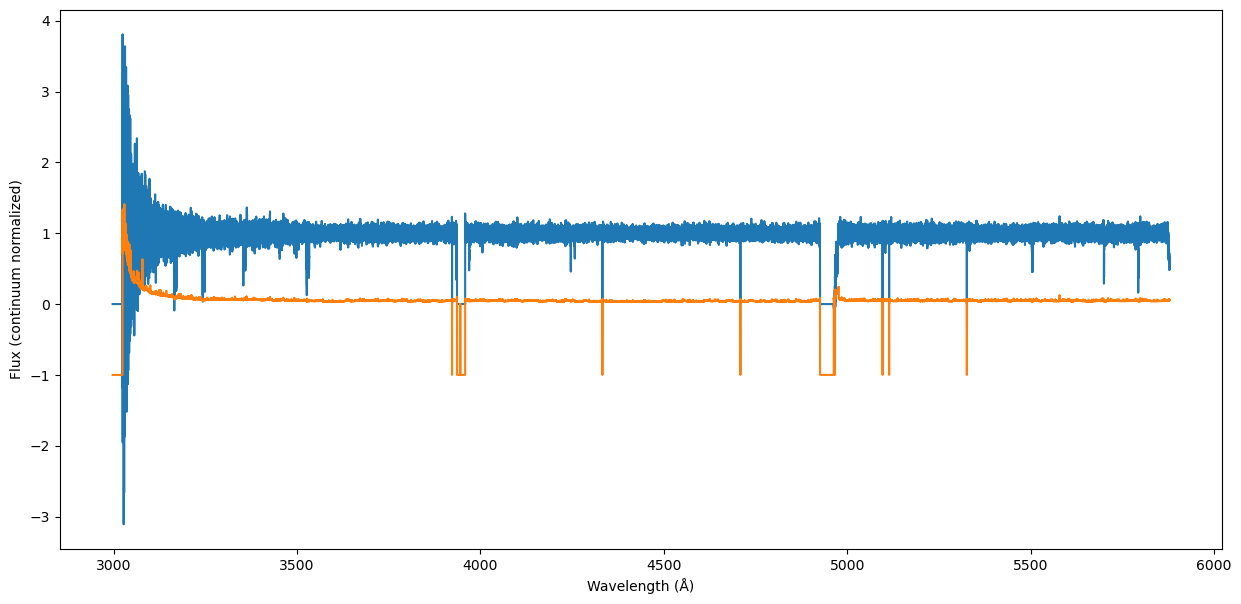

In [37]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav[100:], flux[100:], label='Flux')
ax.plot(wav[100:], err[100:], label='Error')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (continuum normalized)')

Store into a pabs0 friendly file format

In [38]:
c1 = fits.Column(name='wave    ', array=wav, format='D')
c2 = fits.Column(name='flux    ', array=flux, format='D')
c3 = fits.Column(name='error   ', array=err, format='D')
c4 = fits.Column(name='error_u ', array=err, format='D')
c5 = fits.Column(name='error_d ', array=err, format='D')
c6 = fits.Column(name='counts_total', array=np.zeros(len(wav)), format='D')
c7 = fits.Column(name='counts_net', array=np.zeros(len(wav)), format='D')
c8 = fits.Column(name='npix    ', array=np.zeros(len(wav)), format='D')
c9 = fits.Column(name='exptime ', array=np.zeros(len(wav)), format='D')
c10 = fits.Column(name='mask    ', array=np.ones(len(wav)), format='K')
c11 = fits.Column(name='continuum', array=np.ones(len(wav)), format='D')

In [39]:
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3, 
                                           c4, c5, c6, 
                                           c7, c8, c9, 
                                           c10, c11])

In [40]:
hdu = fits.HDUList([fuv_fits[0], table_hdu])

In [41]:
hdu.writeto(rootdir +'PG1522+101_HIRES_pabs0.fits')

### Identifications file

Helper function

In [43]:
def group_redshifts(n_lines, redshifts, redshift_thresh = 0.0003):
    
    systems = np.zeros(n_lines)
    
    # Keep record of the number of systems recorded so far
    n_systems = 1

    for i in range(n_lines):

        # If the current entry has not been placed into a system yet
        if(systems[i] == 0):

            # Initiate a new system here
            systems[i] = n_systems

            # Look at the entries ahead
            for j in range(i+1, n_lines):

                # If the redshift of the entry is within the threshold of the defining entry of the new system
                if (np.abs(redshifts[i]-redshifts[j])<=redshift_thresh):

                    # Place the currently considered entry into the currently considered system
                    systems[j] = n_systems


            # Next, look at a new system
            n_systems += 1
    
    ###print(systems)
    
    # Then, compute the median redshift for each system
    redshift_bin_medians = np.array([np.median(redshifts[systems==i]) for i in range(1,n_systems)])
    
    ###print(redshift_bin_medians)
    
    # Then, compute the rankings of each bin, courtesy below
    # https://stackoverflow.com/questions/5284646/rank-items-in-an-array-using-python-numpy-without-sorting-array-twice
    redshift_bin_rankings = redshift_bin_medians.argsort().argsort()+1
    
    # Then, map the unordered system numbers to the ordered ones
    systems_ordered = np.array([redshift_bin_rankings[int(s-1)] for s in systems])
    
    ###print(systems_ordered)
    
    redshift_bin_medians_ordered = np.array([np.median(redshifts[systems_ordered==i]) for i in range(1,n_systems)])
    
    ###print(redshift_bin_medians_ordered)
    
    return systems_ordered

Now begin grouping

In [44]:
ids_fits_old = fits.open(rootdir + 'PG1522+101_HIRES_features.fits')

In [45]:
ids_fits_old.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HIRES/PG1522+101_HIRES_features.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     71   19R x 27C   [J, 4A, E, E, E, E, E, E, E, E, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, A, J]   


In [46]:
ids_data_old_table = pd.DataFrame(ids_fits_old[1].data).to_numpy()

In [47]:
redshifts_old = ids_data_old_table[:,5]

In [48]:
n_lines_old = ids_data_old_table.shape[0]

In [49]:
systems_old = group_redshifts(n_lines_old, redshifts_old)

Construct the new identification file columns

In [50]:
c1 = fits.Column(name='ion     ', array=ids_data_old_table[:,1], format='10A')
c2 = fits.Column(name='draw    ', array=np.ones(n_lines_old, dtype=bool), format='L')
c3 = fits.Column(name='system_id', array=systems_old, format='K')
c4 = fits.Column(name='wave_r  ', array=np.array(ids_data_old_table[:,2],dtype=float), format='D')
c5 = fits.Column(name='z       ', array=np.array(ids_data_old_table[:,5],dtype=float), format='D')
c6 = fits.Column(name='zErr    ', array=np.zeros(n_lines_old), format='D')
c7 = fits.Column(name='wave_o  ' , array=np.array(ids_data_old_table[:,4],dtype=float), format='D')
c8 = fits.Column(name='Wr      ', array=np.zeros(n_lines_old), format='D')
c9 = fits.Column(name='WrErr   ', array=np.zeros(n_lines_old), format='D')
c10 = fits.Column(name='v_min   ', array=np.zeros(n_lines_old), format='D')
c11 = fits.Column(name='v_max   ', array=np.zeros(n_lines_old), format='D')
c12 = fits.Column(name='logAODN ', array=np.zeros(n_lines_old), format='D')
c13 = fits.Column(name='logAODNerr', array=np.zeros(n_lines_old), format='D')
c14 = fits.Column(name='wave_b0 ', array=np.zeros(n_lines_old), format='D')
c15 = fits.Column(name='wave_b1 ', array=np.zeros(n_lines_old), format='D')
c16 = fits.Column(name='dv90    ', array=np.zeros(n_lines_old), format='D')
c17 = fits.Column(name='logN    ', array=np.zeros(n_lines_old), format='D')
c18 = fits.Column(name='logNerr ', array=np.zeros(n_lines_old), format='D')
c19 = fits.Column(name='b       ', array=np.zeros(n_lines_old), format='D')
c20 = fits.Column(name='bErr    ', array=np.zeros(n_lines_old), format='D')
c21 = fits.Column(name='uncertain', array=np.array(ids_data_old_table[:,26],dtype=bool), format='K')
c22 = fits.Column(name='f       ', array=np.array(ids_data_old_table[:,3],dtype=float), format='D')
c23 = fits.Column(name='selected', array=np.ones(n_lines_old), format='K')
c24 = fits.Column(name='blended ', array=np.zeros(n_lines_old), format='K')

In [51]:
table_hdu_new = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5, c6, 
                                               c7, c8, c9, c10, c11, c12,
                                               c13, c14, c15, c16, c17, c18,
                                               c19, c20, c21, c22, c23, c24])

In [53]:
hdu_new = fits.HDUList([ids_fits[0], table_hdu_new])

In [54]:
hdu_new.writeto(rootdir + 'PG1522+101_HIRES_pabs0_identifications.fits')